In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [146]:
california_housing_ds = fetch_california_housing()
houses_data = pd.DataFrame(california_housing_ds.data,columns=california_housing_ds.feature_names)
houses_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Limpieza de datos
Si existen valores no numéricos o undefined, sklearn nos arrojará un error en tiempo de ejecución en caso de existir dentro de nuestro dataset. Existen muchas formas de hacer una limpieza de los datos. Eliminar NaN, reemplazar NaN con algun valor central (mediana,mediana, moda) o reemplazar ese valor con una constante (0)
- houses_data.isnull().sum() -> Chequeamos por valores faltantes
- houses_data.dropna() -> Eliminamos valores NaN o Nulos
- houses_data.fillna(0,inplace=True) -> Rellena con 0 los NaN
- houses_data['column_name'].fillna(houses_data['column_name'].mean(), inplace=True)

In [147]:
X = houses_data
y = california_housing_dataset.target

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16512, 8) (4128, 8)
(16512,) (4128,)


In [128]:
model = LinearRegression()
model = model.fit(X_train,y_train)

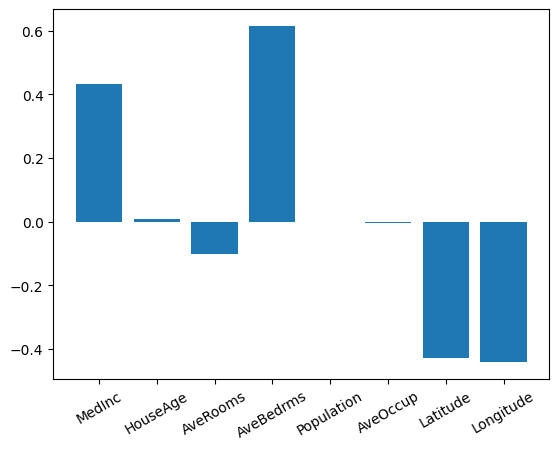

In [158]:
importance = model.coef_ # All the coefcients for each feature column
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X.columns.values.tolist(),rotation=30)
plt.show()

In [156]:
y_train_predict = model.predict(X_train)
print(y_train_predict)

[0.9414806  2.02765445 3.06424237 ... 2.79937446 1.72329784 1.88884477]


In [152]:
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2 = r2_score(y_train,y_train_predict)
print('RMSE for training:', rmse)
print('r2 for training:', r2)

RMSE for training: 0.7207564084685609
r2 for training: 0.6074049305021048


In [155]:
y_test_predict = model.predict(X_test)

### Root mean squared Error

La métrica más comúnmente utilizada para las tareas de regresión es el error cuadrático medio y representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado.

Los valores más bajos de RMSE indican un mejor ajuste. RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción.

### R^2

R-cuadrado tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medio y 1 indica una predicción perfecta. La mejora en el modelo de regresión da como resultado aumentos proporcionales en R-cuadrado.

Una de las dificultades de R-cuadrado es que solo puede aumentar a medida que se agregan predictores al modelo de regresión. Este aumento es artificial cuando los predictores no mejoran el ajuste del modelo. Para remediar esto, una estadística relacionada es R-cuadrado ajustado, incorpora los grados de libertad del modelo

In [154]:
rmse_predict = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2_predict = r2_score(y_test,y_test_predict)
print('RMSE for training:', rmse_predict)
print('r2 for training:', r2_predict)

RMSE for training: 0.737891734750625
r2 for training: 0.6009790143129111


In [149]:
random_X = X.iloc[0].values.reshape(1,-1)
random_y_predicted = model.predict(random_X)
print("random y predicted",random_y_predicted)
print("Real y value: ",y[0])

random y predicted [4.12622041]
Real y value:  4.526


/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
